Name:  

    SEAC4RS_AOD_profile

Purpose:  

    Python script for plotting boundary layer AOD profile

Calling Sequence:

    python SEAC4RS_AOD_profile
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - os
    - datetime
    - mpl_toolkits
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
    - Basemap
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures

Modification History:

    Written: Samuel LeBlanc, NASA Ames, 2015-10-09

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
# matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
from mpltools import color
import numpy as np
import scipy.io as sio
import math
import os
import Sp_parameters as Sp
from path_utils import getpath

In [2]:
from load_utils import mat2py_time, toutc

In [5]:
# set the basic directory path
#fp='C:\\Users\\sleblanc\\Research\\SEAC4RS\\'
fp = getpath('SEAC4RS')

Return path named:  SEAC4RS /data/sam/SEAC4RS/


# Load the 4STAR starsun file

In [6]:
fp

u'/data/sam/SEAC4RS/'

In [7]:
os.path.isfile(fp+'dc8/20130816/20130816starsun_R2.mat')

True

In [12]:
star = sio.loadmat(fp+'dc8/20130816/20130816starsun_R2.mat')#,variable_names=('w','tau_aero','t','Alt','Lat','Lon'))

In [ ]:
star

In [14]:
star.keys()

['Str',
 'tau_O3_err',
 'sza',
 'm_ray',
 'toggle',
 'pitch',
 'Tst',
 'cwv',
 'fwhm',
 'nirt',
 'tau_aero_noscreening',
 'rateaero',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'nirheader',
 'sd_aero_crit',
 'tau_aero_err',
 'dark',
 'nirVdettemp',
 'Elstep',
 'tau_ray',
 'nircols',
 'sunaz',
 'O3col',
 'nirfilen',
 'm_err',
 'f',
 'tau_O4_err',
 'flagallcolsitems',
 't',
 'c0mod',
 'tau_tot_slant',
 'track_err',
 'flagallcols',
 'rate',
 'program_version',
 'sat_time',
 'm_O3',
 'visheader',
 'nirTint',
 'filename',
 'tau_r_err',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'rateslant',
 'visAVG',
 'tau_NO2_err',
 'Zn',
 'AZstep',
 'darkstd',
 'QdVtot',
 'tau_aero_err7',
 'tau_aero_err6',
 'tau_aero_err5',
 'nirAVG',
 'tau_aero_err3',
 'tau_aero_err2',
 'w',
 'ELcorr',
 'visVdettemp_C',
 'tau_aero_err8',
 'El_deg',
 'skyresp',
 'Lon',
 'tau_aero',
 'AZ_deg',
 'visrow_labels',
 'm_H2O',
 'c0err',
 'viscols',
 'tau_CO2_CH4_N2O_abserr',
 'flagitems',
 'aerosolcols',
 'tau_O3',
 'vissat_pi

In [15]:
star['tt'] = mat2py_time(star['t'])
star['utc'] = toutc(star['tt'])

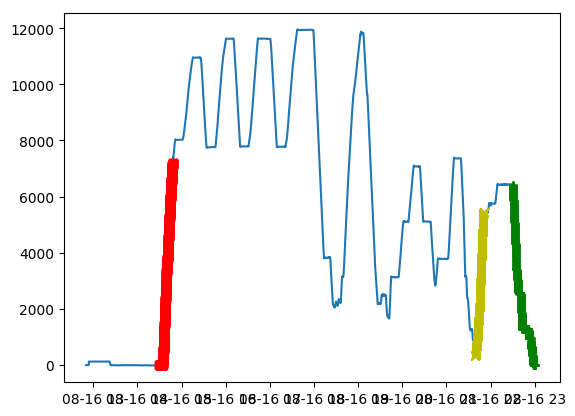

In [19]:
plt.figure()
plt.plot(star['tt'],star['Alt'])
plt.plot(star['tt'][it],star['Alt'][it],'rs')
plt.plot(star['tt'][it2],star['Alt'][it2],'g+')
plt.plot(star['tt'][it3],star['Alt'][it3],'yx')

In [16]:
it = (star['utc']>14.5)&(star['utc']<14.8)

In [17]:
it2 = (star['utc']>22.5)&(star['utc']<23.0)

In [18]:
it3 = (star['utc']>21.65)&(star['utc']<21.85)

<IPython.core.display.Javascript object>


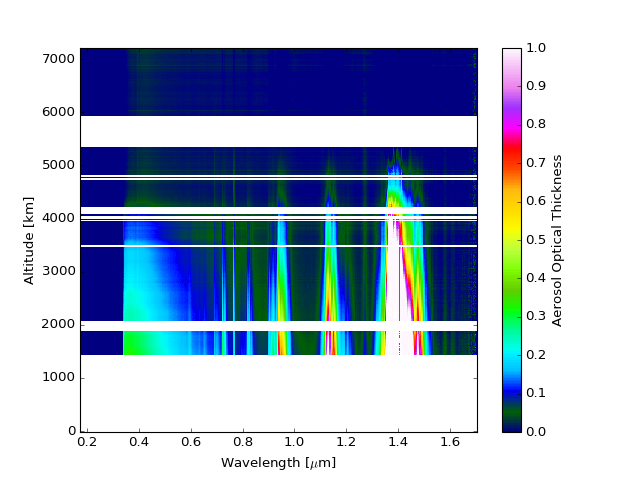

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cb = ax.pcolorfast(star['w'].flatten(),star['Alt'][it].flatten(),star['tau_aero'][it,:][:-1,:-1],
                   cmap='gist_ncar',vmin=0,vmax=1.0)
axc = plt.colorbar(cb)
axc.set_label('Aerosol Optical Thickness')
ax.set_ylabel('Altitude [km]')
ax.set_xlabel('Wavelength [$\mu$m]')

In [21]:
i515 = np.argmin(np.abs(star['w']-0.515))

In [22]:
ii = np.where((star['Alt']>2100)&(star['utc']<14.75))[0][1]

In [23]:
ii

5565

<IPython.core.display.Javascript object>


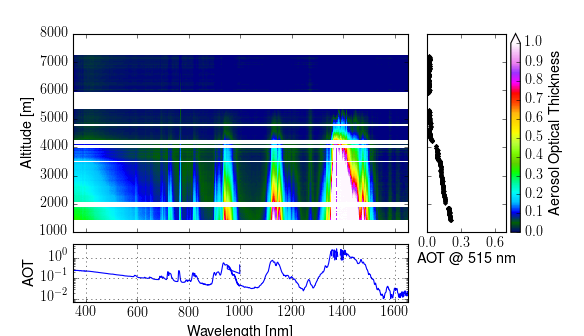

In [163]:
fig = plt.figure()
ax = plt.subplot2grid((4,4),(0,0),colspan=3,rowspan=3)
cb = ax.pcolorfast(star['w'].flatten()*1000.0,star['Alt'][it].flatten(),star['tau_aero'][it,:][:-1,:-1],
                   cmap='gist_ncar',vmin=0,vmax=1.0)
ax2 = plt.subplot2grid((4,4),(0,3),sharey=ax,rowspan=3)
ax2.plot(star['tau_aero'][it,i515],star['Alt'][it],'k.-')
axc = plt.colorbar(cb,extend='max')
axc.set_label('Aerosol Optical Thickness')
ax.set_ylabel('Altitude [m]')
ax.set_ylim([1000,8000])
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_xticks([0.0,0.3,0.6])
ax2.set_xlabel('AOT @ 515 nm')

ax3 = plt.subplot2grid((4,4),(3,0),sharex=ax,colspan=3)
ax3.semilogy(star['w'].flatten()*1000.0,star['tau_aero'][ii,:].flatten())
ax.set_xlim([350,1650])
ax3.set_ylim([0,5.0])
ax3.grid()
ax3.set_xlabel('Wavelength [nm]')
ax3.set_ylabel('AOT')
plt.setp(ax.get_xticklabels(), visible=False)

plt.savefig(fp+'plots\\AOD_Alt_profile_20130816.png',dpi=600,transparent=True)

In [24]:
np.nanargmax(star['tau_aero'][it2,i515])

1325

In [25]:
import scipy.stats as st
import scipy.interpolate as si

In [50]:
def calc_binspline(aod,alt,dz,su=0.0006):
    'Function that calculates the extinction coefficient profile'
    nbin = int((np.nanmax(alt)-np.nanmin(alt))/dz)
    aod_bin, dz_bin_edge, ibin = st.binned_statistic(alt,aod,bins=nbin)
    dz_bin = np.array([(dz_bin_edge[iz+1]+ddz)/2.0 for iz,ddz in enumerate(dz_bin_edge[0:-1])])
    if any(np.isfinite(aod_bin)):
        aodc_fx = si.UnivariateSpline(dz_bin[np.isfinite(aod_bin)],aod_bin[np.isfinite(aod_bin)],s=su)
        #extc_fx = aodc.derivative()
        aodc = aodc_fx(dz_bin)
    else:
        aodc = dz_bin*np.nan
    return aodc,dz_bin

<IPython.core.display.Javascript object>


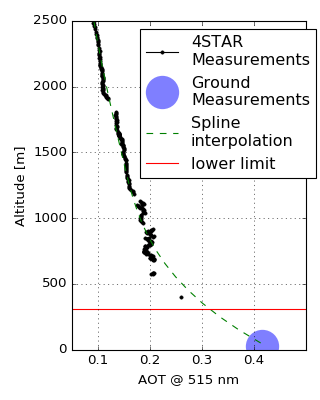

In [128]:
plt.figure(figsize=(4,5))
plt.plot(star['tau_aero'][it3,i515],star['Alt'][it3],'k.-',label='4STAR\nMeasurements')
plt.plot(star['tau_aero'][it2,i515][1325],[25.0],'bo',label='Ground\nMeasurements',markeredgecolor='None',markersize=30,alpha=0.5)
new_aod = np.append(star['tau_aero'][it2,i515][1325],star['tau_aero'][it3,i515])
new_alt = np.append([0.0],star['Alt'][it3])
aod_spl,dz_spl = calc_binspline(new_aod,new_alt,100.0)
plt.plot(aod_spl,dz_spl,'g--',label='Spline\ninterpolation')
plt.axhline(305,color='r',label='lower limit')
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=[1.08,1.0])
plt.grid()
plt.ylabel('Altitude [m]')
plt.xlabel('AOT @ 515 nm')
#plt.yscale('log')
plt.ylim(0,2500)
plt.xticks([0.0,0.1,0.2,0.3,0.4])
plt.tight_layout()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1+0.05,x2+0.05,y1,y2))

plt.savefig(fp+'Low_Alt_AOD_profile_20130816.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


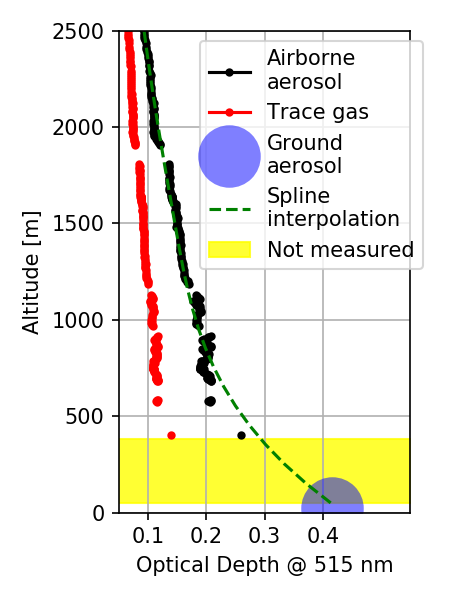

In [74]:
plt.figure(figsize=(3,4))
plt.plot(star['tau_aero'][it3,i515],star['Alt'][it3],'k.-',label='Airborne\naerosol')
plt.plot(star['tau_tot_slant'][it3,i515]-star['tau_aero'][it3,i515],star['Alt'][it3],'r.-',label='Trace gas')
plt.plot(star['tau_aero'][it2,i515][1325],[25.0],'bo',label='Ground\naerosol',markeredgecolor='None',markersize=30,alpha=0.5)
new_aod = np.append(star['tau_aero'][it2,i515][1325],star['tau_aero'][it3,i515])
new_alt = np.append([0.0],star['Alt'][it3])
aod_spl,dz_spl = calc_binspline(new_aod,new_alt,100.0)
plt.plot(aod_spl,dz_spl,'g--',label='Spline\ninterpolation')
plt.fill_between([0.0,0.6],[380,380],[50,50],color='yellow',alpha=0.8,label='Not measured')
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=[1.08,1.0])
plt.grid()
plt.ylabel('Altitude [m]')
plt.xlabel('Optical Depth @ 515 nm')
#plt.yscale('log')
plt.ylim(0,2500)
plt.xticks([0.0,0.1,0.2,0.3,0.4])
plt.xlim([0,0.5])
plt.tight_layout()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1+0.05,x2+0.05,y1,y2))

plt.savefig(fp+'Proposal_Low_Alt_OD_profile_20130816.png',dpi=600,transparent=True)

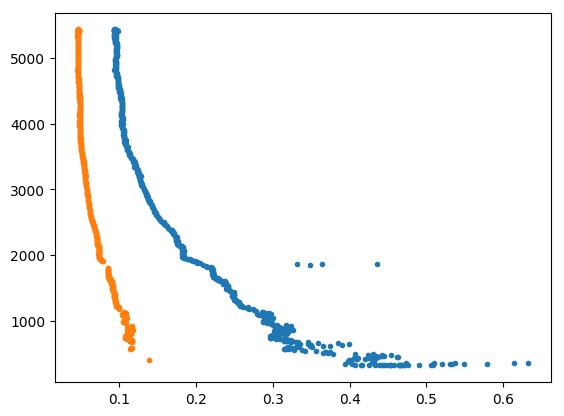

In [64]:
plt.figure()
plt.plot(star['tau_tot_slant'][it3,i515],star['Alt'][it3],'.')
plt.plot(star['tau_tot_slant'][it3,i515]-star['tau_aero'][it3,i515],star['Alt'][it3],'.')

In [165]:
from mpl_toolkits.basemap import Basemap,cm

In [167]:
star.keys()

['utc',
 'tt',
 'Lon',
 '__header__',
 'tau_aero',
 '__globals__',
 't',
 'w',
 'Lat',
 'Alt',
 '__version__']

<IPython.core.display.Javascript object>


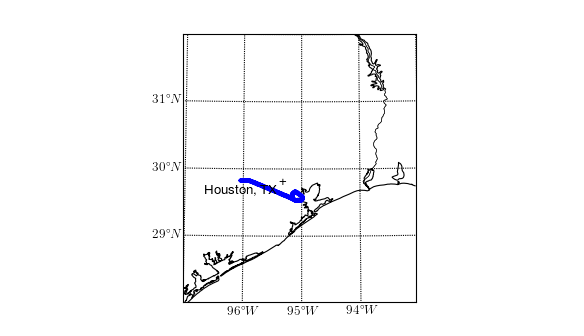

In [172]:
fig,ax = plt.subplots(1,1)
m = Basemap(projection='stere',lon_0=-95,lat_0=30,
            llcrnrlon=-97, llcrnrlat=28,
            urcrnrlon=-93, urcrnrlat=32,resolution='h',ax=ax)
m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
m.drawstates()
m.drawcountries()
m.drawmeridians([-93,-94,-95,-96,-97,-98],labels=[0,0,0,1])
m.drawparallels([26,27,28,29,30,31,32,33],labels=[1,0,0,0])
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
m.plot(star['Lon'][it],star['Lat'][it],'b.',latlon=True)
plt.savefig(fp+'plots\\map_take_off_profile_20130816.png',dpi=600,transparent=True)

In [173]:
import map_utils as mu

In [180]:
pos1,pos2 = [star['Lat'][it][0][0],star['Lon'][it][0][0]],[star['Lat'][it][-1][0],star['Lon'][it][-1][0]]

In [182]:
mu.spherical_dist(pos1,pos2)

90.352758226228616